# Ex. 2
Please fill-in your ID in the following cell, *No Names!*

Then fill your names in the next two cells.

In [1]:
id1 = "206239568"
id2 = "207330176"

name_student_1 = "Kobi, Mazuz"
name_student_2 = "Dolev, Nahmias"

import pandas as pd
import numpy as np
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
df = pd.DataFrame([id1])
df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)

Intro - Opening the vaccination DataFrame and selecting the country Denmark.

In [2]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
Denmark = vacc_df.loc[(vacc_df.location == 'Denmark')]

q1: Our country selection is "denmark", Showing the first three rows.

In [3]:
Denmark[0:3]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
3100,Denmark,DNK,2020-12-27,6394.0,6394.0,NaN,NaN,NaN,0.11,0.11,NaN,NaN
3101,Denmark,DNK,2020-12-28,8417.0,8417.0,NaN,2023.0,2023.0,0.15,0.15,NaN,349.0
3102,Denmark,DNK,2020-12-29,17235.0,17235.0,NaN,8818.0,5420.0,0.30,0.30,NaN,936.0


q2: Which column has the maximum number of missing values(NaN)? 
    How many missing values are there in that column

In [4]:
max_nan_col = Denmark.columns[Denmark.isna().sum() == Denmark.isna().sum().max()]
max_value = str(Denmark.isna().sum().max())
for i in max_nan_col:
    print("The column "+i+" has the maximun number of NaN values: "+max_value)

The column people_fully_vaccinated has the maximun number of NaN values: 19
The column people_fully_vaccinated_per_hundred has the maximun number of NaN values: 19


q3: Show the rows holding no values for the column daily_vaccinations.

In [5]:
Denmark.loc[Denmark['daily_vaccinations'].isna()]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
3100,Denmark,DNK,2020-12-27,6394.0,6394.0,NaN,NaN,NaN,0.11,0.11,NaN,NaN


q4: Fill missing values of the column daily_vaccinations, explain the method you used and why you think its the best method.
הסבר - בחרנו בדרך הישירה למרות שקופצת אזהרה שלא רלוונטית אלינו, בנוסף ביטלנו את האזהרה ע"מ שלא תרתיע משתמשים.
אני חושב שזו הדרך הטובה והיעילה ביותר כי היא ישירה, פשוטה ומבטלת את האזהרה המיותרת של פנדס להמשך העבודה על הקובץ.
החלפנו ערכים חסרים באפס בגלל שזה הגיוני - היום היחיד שאין ערך עבור מספר המתחסנים הוא היום הראשון שבו התחילו למדוד, משמע - או שאנשים התחסנו במקום אחר והגיעו מחוסנים או שהתחסנו לפני שהתחילו לאסוף נתונים על המדינה, בכל אופן ההגיון אומר שאם אין כמות מתחסנים יומית בתאריך הראשון שבו התחילו לאסוןף נתונים נדראש להחליף אותו באפס.

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'
Denmark['daily_vaccinations'] = Denmark['daily_vaccinations'].fillna(0)

q5: create histogram for the cloumns total_vaccinations and people_vaccinated.

<AxesSubplot:ylabel='Frequency'>

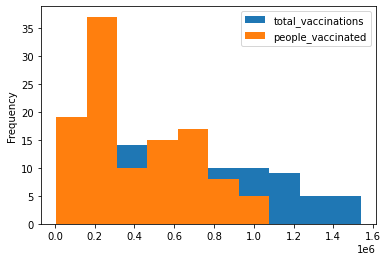

In [7]:
total_vaccinations = Denmark['total_vaccinations']
people_vaccinated = Denmark['people_vaccinated']
Denmark_histogram = pd.DataFrame({'total_vaccinations': total_vaccinations, 'people_vaccinated': people_vaccinated})
Denmark_histogram.plot.hist()

q6 part 1: Create a boxplot for the column people_fully_vaccinated_per_hundred.

<AxesSubplot:>

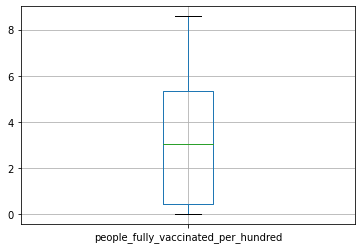

In [8]:
Denmark['people_fully_vaccinated_per_hundred'] = Denmark['people_fully_vaccinated_per_hundred'].fillna(0)
Denmark.boxplot(column=['people_fully_vaccinated_per_hundred'])

q6 part 2: להראות מה הקו הירוק בבוקספלוט מסמן
ע"מ לבדוק מה הקו הירוק מסמן ניקח דאטהפריים שלי שהחציון, ממוצע, שכיח וסטיית תקן שלו בהכרח שונים(הדאטהפריים שלנו משתנה ולכן לא טוב להתבסס
עליו), נראה את הבוקספלוט ונראה לאיזה מנתונים זה מתאים - במקרה שלנו הקו הירוק גדול מאפס וקטן מחמש.
מסקנה: הקו הירוק מסמן את החציון של הבוקספלוט.

The greeen line in the boxplot is the Median and his value is 4.5


<AxesSubplot:>

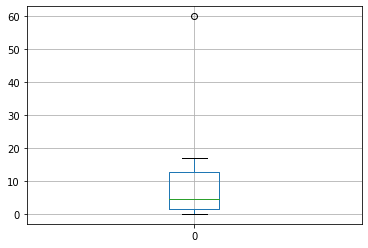

In [17]:
import statistics
df_check = pd.DataFrame([0,1,1,3,3,6,6,15,17,60])  
df_check_dict = {"Median":float(df_check.median()),"Mean":float(df_check.mean()),"Mode":float(statistics.mode(df_check)),"Standart deviation":float(np.std(df_check))}
for key,value in df_check_dict.items():
    if value<5 and value>0:
        print("The greeen line in the boxplot is the "+key+" and his value is "+str(value))
df_check.boxplot(column = [0])

q7: Add a row 'month' and show the columns daily_vaccinations and people_vaccinated_per_hundred (nX3 matrix).

In [10]:
Denmark['month'] = pd.DatetimeIndex(Denmark['date']).month
df = Denmark.groupby('month')[['daily_vaccinations']].max()
df['people_vaccinated_per_hundred'] = Denmark.groupby('month')[['people_vaccinated_per_hundred']].max()
df

,daily_vaccinations,people_vaccinated_per_hundred
month,,
1,10779.0,3.19
2,17289.0,7.40
3,18929.0,12.84
4,34799.0,17.95
12,7383.0,0.60


q8: Sort the results from q7, if they are already sorted, show how to sort them.

In [11]:
df.sort_values('people_vaccinated_per_hundred')

,daily_vaccinations,people_vaccinated_per_hundred
month,,
12,7383.0,0.60
1,10779.0,3.19
2,17289.0,7.40
3,18929.0,12.84
4,34799.0,17.95
